In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import glob

%load_ext autoreload
%autoreload 2
%matplotlib inline

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['legend.fontsize']=20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
amac='AMACREF1'

In [138]:
datas=[]
for inpath in glob.glob('{}_VADC_*.csv'.format(amac)):
    data=pd.read_csv(inpath,sep='\t')
    datas.append(data)
data=pd.concat(datas)

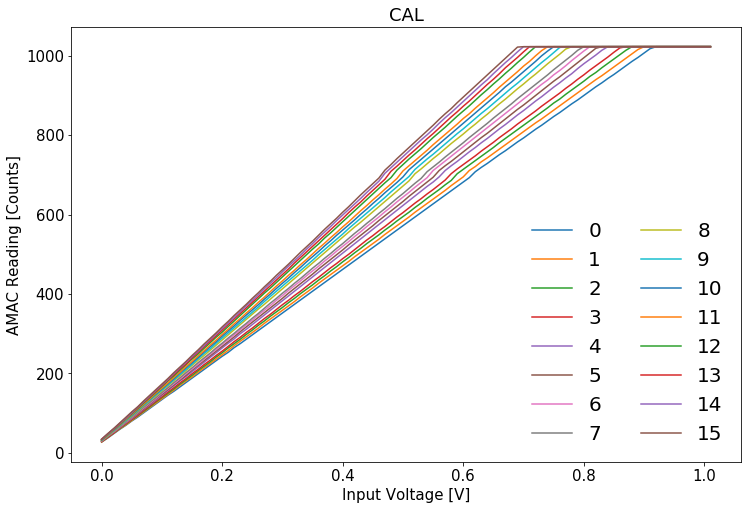

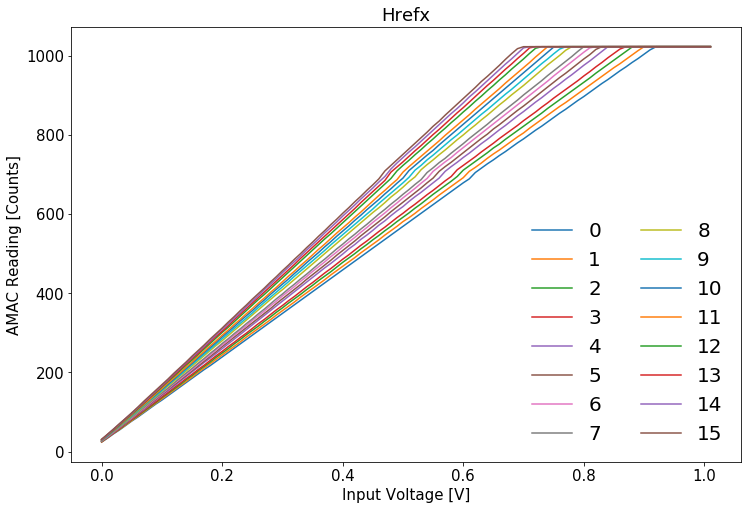

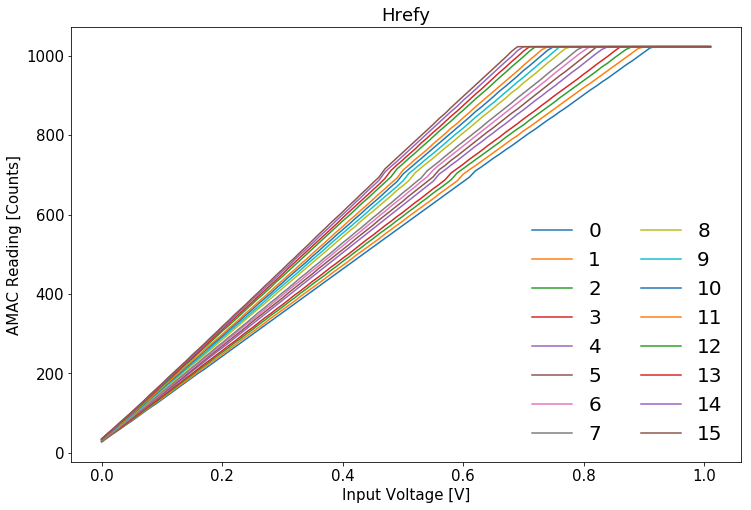

In [139]:
for ch,chdata in data.groupby('Channel'):
    for ramp,rampdata in chdata.groupby('RampGain'):
        plt.plot(rampdata.Voltage,rampdata.Counts,'-',label=ramp)
    plt.xlabel('Input Voltage [V]')
    plt.ylabel('AMAC Reading [Counts]')
    plt.legend(frameon=False,ncol=2)
    plt.title(ch)
    plt.show()

In [140]:
datas=[]
for inpath in glob.glob('{}_ZEROCALIB_CH*.csv'.format(amac)):
    tmpdata=pd.read_csv(inpath,sep='\t')
    datas.append(tmpdata)
zerodata=pd.concat(datas)

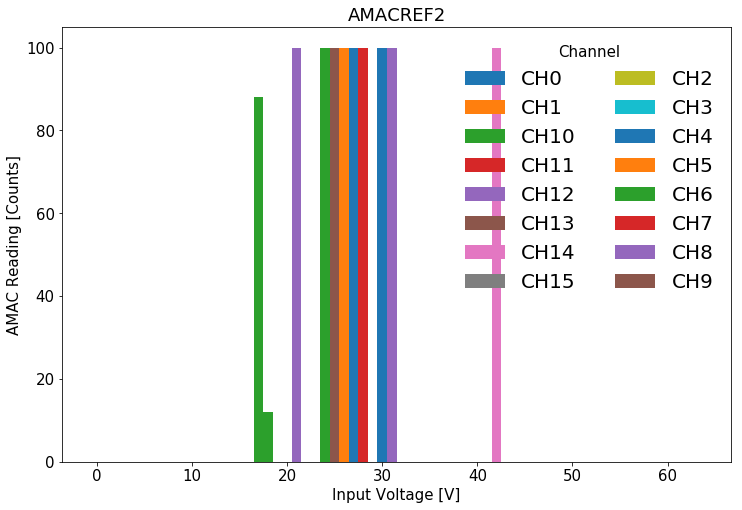

In [141]:
rampdata=zerodata[(zerodata.RampGain==0)]
for ch,chdata in rampdata.groupby('Channel'):
    plt.hist(chdata.Counts,range=(-0.5,63.5),bins=64,label=ch)
plt.xlabel('Input Voltage [V]')
plt.ylabel('AMAC Reading [Counts]')
plt.title('AMACREF2')
plt.legend(frameon=False,ncol=2,title='Channel')

In [142]:
ZERO_CAL  =zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH4' )].Counts.mean()
ZERO_Hrefx=zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH10')].Counts.mean()
ZERO_Hrefy=zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH11')].Counts.mean()
ZERO_PTAT =zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH15')].Counts.mean()

In [143]:
CALdata  =data[(data.RampGain==0)&(data.Channel=='CAL'  )]
Hrefxdata=data[(data.RampGain==0)&(data.Channel=='Hrefx')]
Hrefydata=data[(data.RampGain==0)&(data.Channel=='Hrefy')]
PTATdata =data[(data.RampGain==0)&(data.Channel=='PTAT' )]

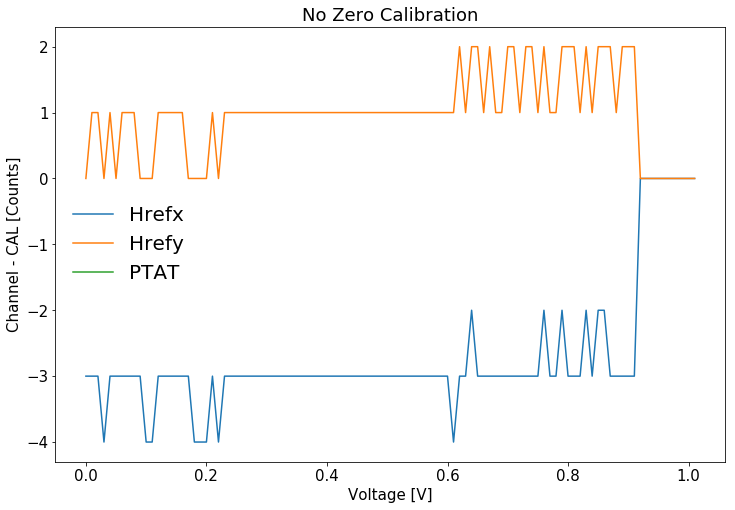

In [144]:
plt.plot(CALdata.Voltage,Hrefxdata.Counts-CALdata.Counts,label='Hrefx')
plt.plot(CALdata.Voltage,Hrefydata.Counts-CALdata.Counts,label='Hrefy')
plt.plot(CALdata.Voltage,PTATdata.Counts -CALdata.Counts,label='PTAT')
plt.xlabel('Voltage [V]')
plt.ylabel('Channel - CAL [Counts]')
plt.title('No Zero Calibration')
plt.legend(frameon=False)

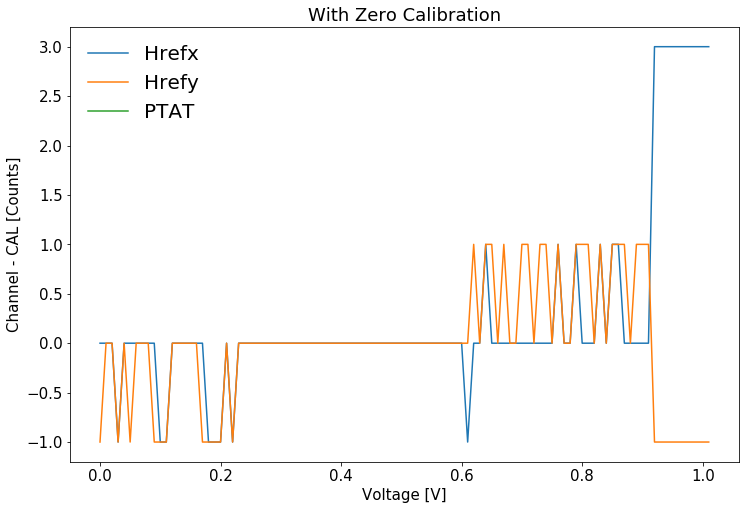

In [145]:
plt.plot(CALdata.Voltage,Hrefxdata.Counts-ZERO_Hrefx-CALdata.Counts+ZERO_CAL,label='Hrefx')
plt.plot(CALdata.Voltage,Hrefydata.Counts-ZERO_Hrefy-CALdata.Counts+ZERO_CAL,label='Hrefy')
plt.plot(CALdata.Voltage,PTATdata.Counts -ZERO_PTAT -CALdata.Counts+ZERO_CAL,label='PTAT')
plt.xlabel('Voltage [V]')
plt.ylabel('Channel - CAL [Counts]')
plt.title('With Zero Calibration')
plt.legend(frameon=False)